# Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Dataset

In [2]:
df_places = pd.read_csv('./places_bordeaux.csv')
df_places.head()

,id,nom,nbAvis,latitude,longitude,shape_gid,gtrip
0,279126,Château Hôtel Grand Barrail,624,44.847416,-0.545655,48328,488277
1,2296349,Le Tri Délice,230,44.838370,-0.614478,48328,207338
2,1322100,Le Six,4,44.849728,-0.621315,48328,207338
3,1327175,El Latino,0,44.825592,-0.613824,48328,207338
4,1334892,La Bouillabaisse,53,44.838260,-0.610960,48328,207338


C:\Users\yh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


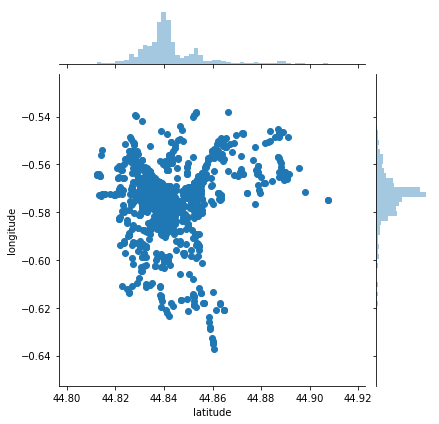

In [3]:
sns.jointplot(x=df_places['latitude'], y=df_places['longitude'], kind='scatter')

# Analysis 

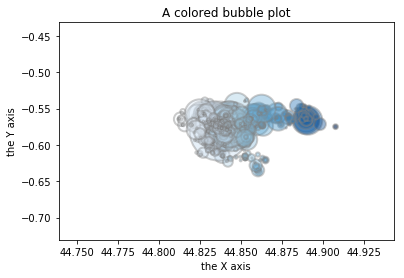

In [4]:
# create data
x = df_places['latitude']
y = df_places['longitude']
z = df_places['nbAvis']

# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()

In [5]:
import folium

print(folium.__version__)

0.7.0


In [6]:
from folium.plugins import HeatMap

m = folium.Map([44.837789,-0.57918], zoom_start=13)

HeatMap(df_places[['latitude', 'longitude', 'nbAvis']].values.tolist()).add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [7]:
df_reviews = pd.read_csv('./reviews_bordeaux.csv')
df_reviews.head()

,id,idplace,idauteur,note,date_review,date_visit,langue
0,363148788,279126,7386E435D0FA163D6567DAFD43F678AB,4,2016-04-10,2016-04-01,fra
1,363126549,279126,NaN,4,2016-04-10,2016-04-01,fra
2,361992056,279126,793FE9FFFA92C30BDEDDDBC43860CC39,4,2016-04-06,2016-03-01,fra
3,359826354,279126,271DB80F27BB12FFD49F98E865E9439E,5,2016-03-29,2016-03-01,fra
4,358729279,279126,665467D0896374356BE7A325D33B53B8,4,2016-03-26,2016-03-01,fra


# Volume per place using reviews

In [8]:
nb_places = len(df_places)
nb_places

1858

In [9]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.head()

,id,latitude,longitude
0,279126,44.847416,-0.545655
1,2296349,44.838370,-0.614478
2,1322100,44.849728,-0.621315
3,1327175,44.825592,-0.613824
4,1334892,44.838260,-0.610960


In [10]:
tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])

for i in range(nb_places):
    tmp_volume["volume"][i] = len(df_reviews[df_reviews["idplace"] == df_tmp_places["id"][i] ])

In [11]:
tmp_volume

,volume
0,640
1,233
2,0
3,0
4,43
5,82
6,89
7,329
8,0
9,1


# Using reviews in time

In [12]:
from datetime import datetime

In [13]:
def add_one_month(date):
    if date.month < 12 : 
        return date.replace(month=date.month+1)
    else :
        return date.replace(month=1, year=date.year+1)

In [14]:
df_tmp_places = df_places[["id", "latitude", "longitude"]]
df_tmp_places.reset_index(inplace=True,drop=True)
nb_places = len(df_tmp_places)
df_tmp_places.head()

,id,latitude,longitude
0,279126,44.847416,-0.545655
1,2296349,44.838370,-0.614478
2,1322100,44.849728,-0.621315
3,1327175,44.825592,-0.613824
4,1334892,44.838260,-0.610960


In [ ]:
# BEGINNING DATE : 2003-01-03 - ENDING DATE : 2016-12-09
date_from = datetime.strptime('2003-01-01', '%Y-%m-%d')
date_to = add_one_month(date_from)

# periodic_volumes is an array containing all volumes for each place, each month
# periodic_volumes is an array of arrays : [ [[latitude, longitude, volume],... ], ... ]
periodic_volumes =[] 

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 168

for j in range(number_of_month) :
    print("j : "+str(j))
    
    # creating df volume
    tmp_volume = pd.DataFrame(index=df_tmp_places.index, columns=["volume"])
    for i in range(nb_places):
        
        tmp_selected_reviews = df_reviews[(df_reviews["idplace"] == df_tmp_places["id"][i]) 
                                         & (df_reviews["date_review"] != "0000-00-00")]
        
        # Reinitializing index of dataframe :
        tmp_selected_reviews.reset_index(inplace=True,drop=True)
        
        bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])
        
        for k in range(len(tmp_selected_reviews)): 
            bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
            bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

        tmp_volume["volume"][i] = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
        

    
    # fusion avec df places
    df_result = pd.concat([df_tmp_places[["latitude","longitude"]], tmp_volume],axis=1) 
    
    # conversion en array
    tmp_array = df_result[df_result['volume'] != 0].values.tolist()
    
    # ajout à l'array globale
    periodic_volumes.append(tmp_array)
    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)

    
# calculer les volume sur un mois, ranger ca dans une array, faire pareil pour les mois suivants


j : 0
j : 1
j : 2
j : 3
j : 4
j : 5
j : 6
j : 7
j : 8
j : 9
j : 10
j : 11
j : 12
j : 13
j : 14


In [16]:
#import folium
import folium.plugins as plugins

m = folium.Map([44.837789,-0.57918], zoom_start=13)

hm = plugins.HeatMapWithTime(periodic_volumes)

hm.add_to(m)

#m.save(os.path.join('results', 'Heatmap.html'))

m

In [19]:
#m.save(os.path.join('results', 'Heatmap_Courchevel.html'))

# Calculating the intensity indicator

In [15]:
%run growth_value.ipynb

Function get_growth(date) is now available.


In [ ]:
# BEGINNING DATE : 2003-01-03 - ENDING DATE : 2016-12-09
date_from = datetime.strptime('2003-01-01', '%Y-%m-%d')
date_to = add_one_month(date_from)

area = 49.36 #km²
density = nb_places / area

# Loop for the right number of month between the beginning date and the ending date :
number_of_month = 168

df_intensity = pd.DataFrame(index=range(number_of_month), columns=["date","volume","intensity"])


for j in range(number_of_month) :
    print(j)
    
    # pour chaque mois 
    # on compte le nombre de reviews 
    # Selecting reviews with a valid date : 
    tmp_selected_reviews = df_reviews[(df_reviews["date_review"] != "0000-00-00")]


    # Reinitializing index of dataframe :
    tmp_selected_reviews.reset_index(inplace=True,drop=True)

    bool_period = pd.DataFrame(index=range(len(tmp_selected_reviews)), columns=["after", "before"])

    for k in range(len(tmp_selected_reviews)): 
        bool_period["after"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') >= date_from
        bool_period["before"][k] = datetime.strptime(str(tmp_selected_reviews["date_review"][k]), '%Y-%m-%d') < date_to

    volume = len(tmp_selected_reviews[bool_period["after"] & bool_period["before"]])
    
    df_intensity["date"][j] = date_from
    df_intensity["volume"][j] = volume
    df_intensity["intensity"][j] = ( volume / get_growth(date_from) ) * density

    
    # incrementation du temps
    date_from = add_one_month(date_from)
    date_to = add_one_month(date_from)


0
1
2
3


In [19]:
df_intensity.head()

,date,volume,intensity
0,2003-07-01 00:00:00,1,0.000178523
1,2003-08-01 00:00:00,0,0
2,2003-09-01 00:00:00,0,0
3,2003-10-01 00:00:00,0,0
4,2003-11-01 00:00:00,0,0


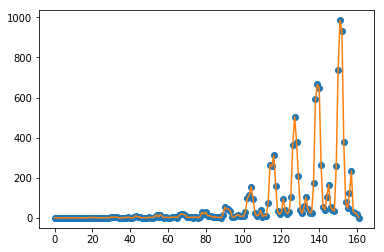

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['volume'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()

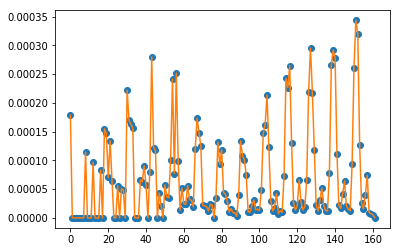

In [21]:
# introduce some floats in our x-values
x = list(range(number_of_month))
y = list(df_intensity['intensity'])


plt.plot(x, y, 'o')
#plt.plot(lowess_x, lowess_y, '*')
plt.plot(x, y, '-')
plt.show()